# Multivariate Linear Regression on ENB Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv("./dataset/energy_efficiency_data.csv")

In [3]:
# print first 5 rows
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# check for missing values
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [5]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Select Features (X) and Target (y)

In [7]:
# Dataset has 8 features (columns 0 to 7) and 2 target variables (last 2 columns)
X = df.iloc[:,:-2] # all rows, first 8 columns → features
y = df.iloc[:,8:] # all rows, last 2 columns → targets (Heating, Cooling load)

In [10]:
print("The shape of X (Features): ",X.shape)
print("The shape of y (target variables): ", y.shape)

The shape of X (Features):  (768, 8)
The shape of y (target variables):  (768, 2)


## Split dataset into train and test samples

In [11]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [12]:
X_train.shape

(614, 8)

In [13]:
X_test.shape

(154, 8)

## Train Multi-variate Linear Regression Model

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Make Predictions on test sample

In [16]:
y_pred = model.predict(X_test)

## Evaluate the model performance

In [17]:
# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 9.523307751573416
R² Score: 0.9027048110077098


## Compare Predictions with Actual Values

In [19]:
print("\nFirst 5 Predictions:\n", y_pred[:5])
print("\nFirst 5 Actual Values:\n", y_test.values[:5])


First 5 Predictions:
 [[18.86296033 19.75455641]
 [14.04938012 16.77160938]
 [31.31560297 32.02497722]
 [35.90050966 36.70240832]
 [15.33519734 17.27670437]]

First 5 Actual Values:
 [[16.47 16.9 ]
 [13.17 16.39]
 [32.82 32.78]
 [41.32 46.23]
 [16.69 19.76]]


## Visualization

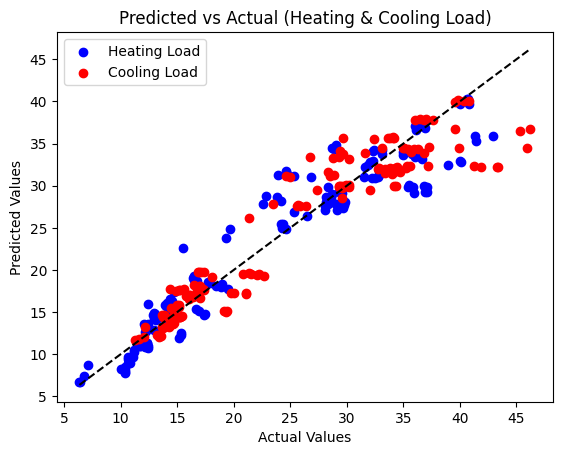

In [20]:
# Scatter plot: Predicted vs Actual for Heating Load (first target)
plt.scatter(y_test.iloc[:,0], y_pred[:,0], color="blue", label="Heating Load")
plt.scatter(y_test.iloc[:,1], y_pred[:,1], color="red", label="Cooling Load")
plt.plot([y_test.min().min(), y_test.max().max()],
         [y_test.min().min(), y_test.max().max()],
         color="black", linestyle="--")  # perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Heating & Cooling Load)")
plt.legend()
plt.show()

In [24]:
import numpy as np
# Loop through each target separately
target_names = ["Heating Load", "Cooling Load"]

for i, name in enumerate(target_names):
    mse_i = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2_i = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"\n{name}:")
    print(f"  MSE: {mse_i:.2f}")
    print(f"  RMSE: {np.sqrt(mse_i):.2f}")
    print(f"  R²: {r2_i:.4f}")



Heating Load:
  MSE: 9.15
  RMSE: 3.03
  R²: 0.9122

Cooling Load:
  MSE: 9.89
  RMSE: 3.15
  R²: 0.8932


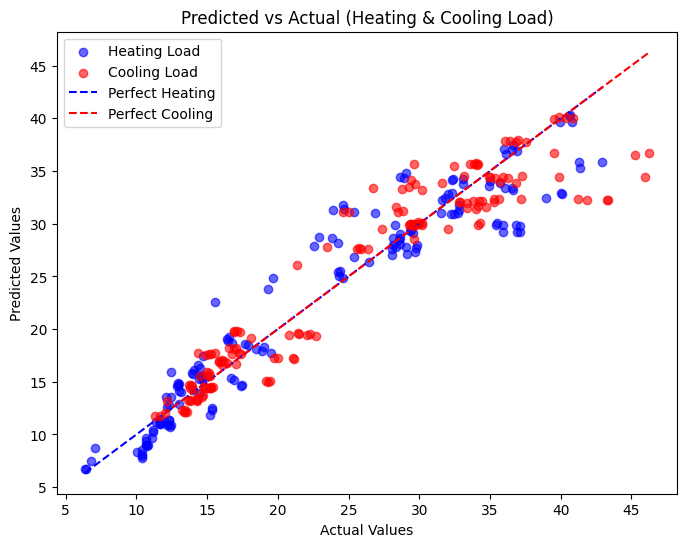

In [22]:
plt.figure(figsize=(8,6))

# Scatter plots for actual vs predicted
plt.scatter(y_test.iloc[:,0], y_pred[:,0], color="blue", alpha=0.6, label="Heating Load")
plt.scatter(y_test.iloc[:,1], y_pred[:,1], color="red", alpha=0.6, label="Cooling Load")

# Heating load perfect line
plt.plot([y_test.iloc[:,0].min(), y_test.iloc[:,0].max()],
         [y_test.iloc[:,0].min(), y_test.iloc[:,0].max()],
         color="blue", linestyle="--", label="Perfect Heating")

# Cooling load perfect line
plt.plot([y_test.iloc[:,1].min(), y_test.iloc[:,1].max()],
         [y_test.iloc[:,1].min(), y_test.iloc[:,1].max()],
         color="red", linestyle="--", label="Perfect Cooling")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Heating & Cooling Load)")
plt.legend()
plt.show()
